In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks

#read files

df_eda =pd.read_csv("C:/Users/anilp/Project_Files/EDA.csv", skiprows=1)
df_bvp =pd.read_csv("C:/Users/anilp/Project_Files/BVP.csv", skiprows=1)

eda_value = df_eda.rename(columns = {'4.000000' : 'EDA'})
bvp_value = df_bvp.rename(columns = {'64.000000' : 'BVP'})

# eda_value = df_eda['4.000000']
# bvp_value = df_bvp['64.000000']

# if first_value =! 4 or 64:
#     delete first value
# else:
#     pass


[    4     8    11 ... 35464 35468 35475]


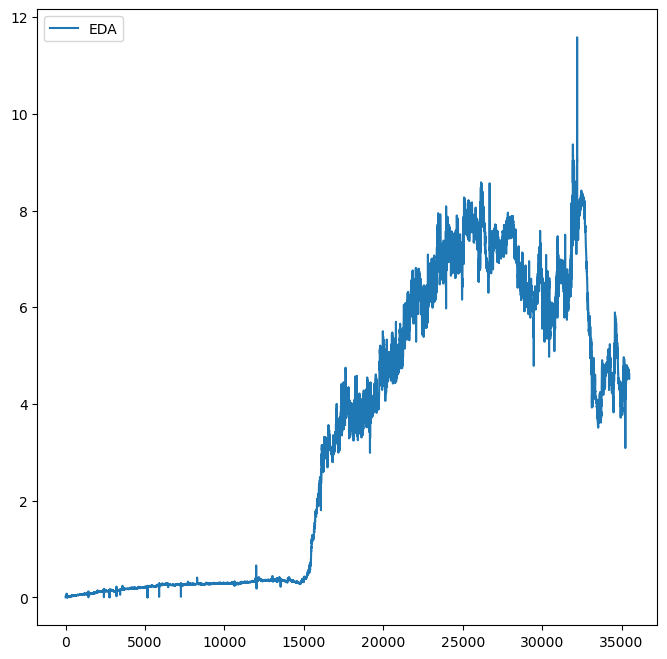

In [3]:
#first eda plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.legend()

peaks_eda, _ = find_peaks(eda_value['EDA'])
print(peaks_eda)

[    11     78    120 ... 567763 567801 567814]


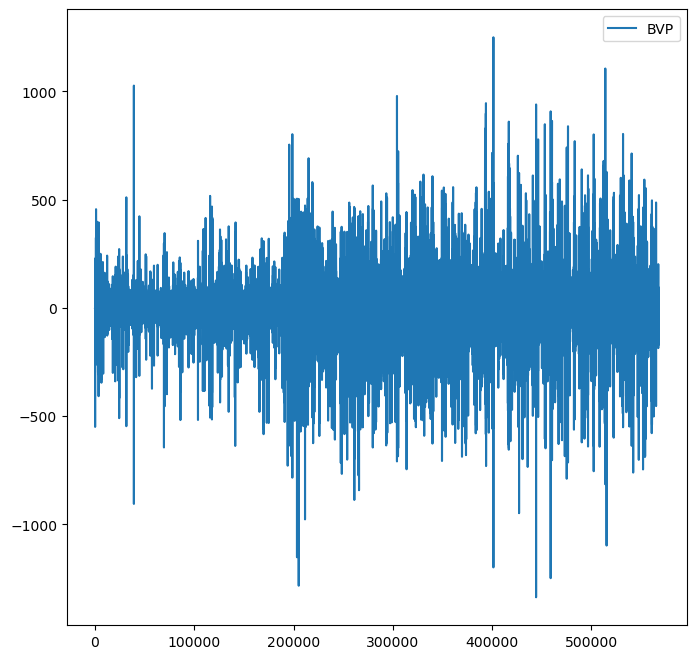

In [4]:
#first bvp plot and print peaks

plt.figure(figsize=(8, 8))
plt.plot(bvp_value, label='BVP')
plt.legend()

peaks_bvp, _ = find_peaks(bvp_value['BVP'])
print(peaks_bvp)

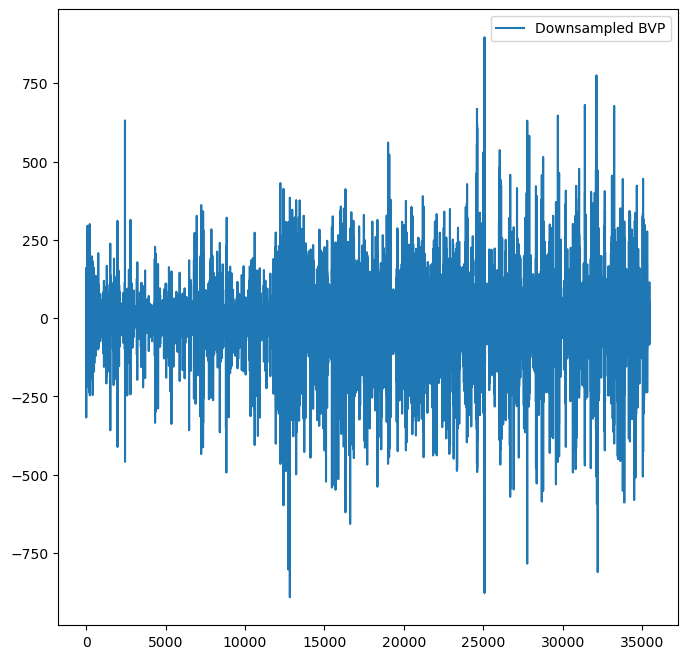

In [5]:
#downsample bvp to match eda

window = 16
downsampled_bvp = bvp_value.groupby((bvp_value.index/window).astype('i')).mean()

plt.figure(figsize=(8, 8))
plt.plot(downsampled_bvp, label='Downsampled BVP')
plt.legend()

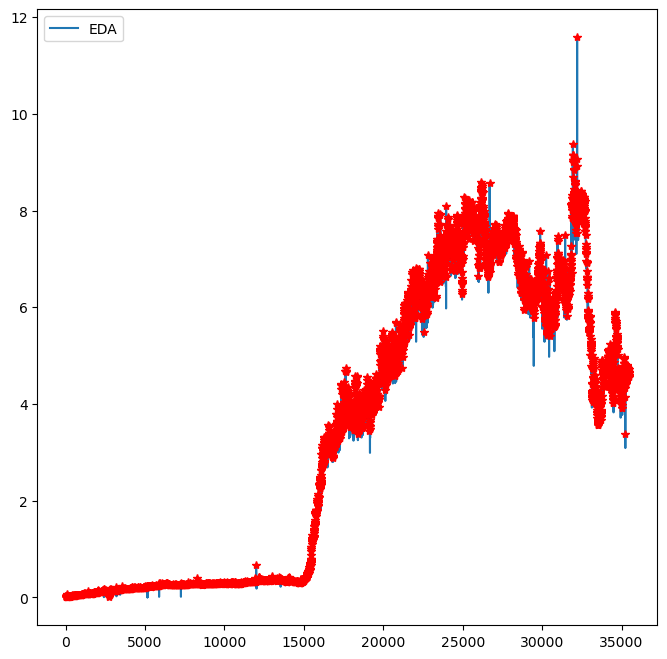

In [6]:
#marking the peaks eda

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(eda_value['EDA'][peaks_eda], 'r*') # 'r*' will plot stars of red color.
plt.legend()

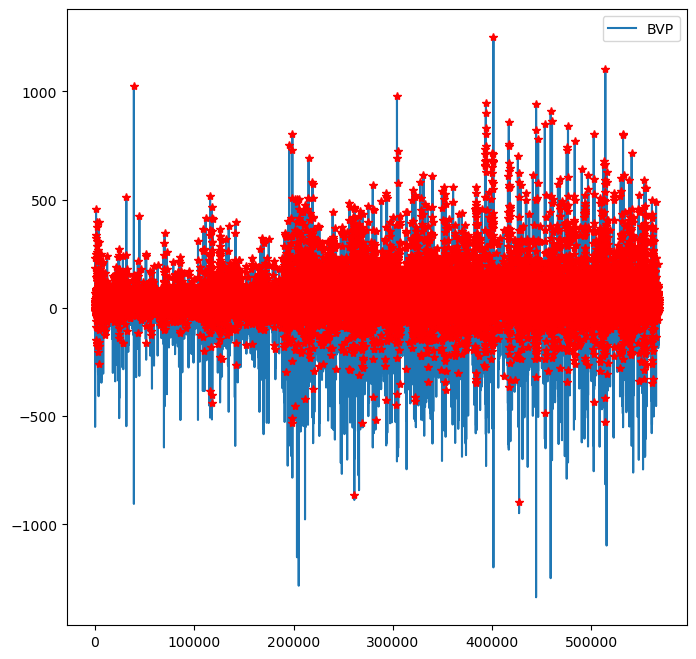

In [7]:
#marking the peaks bvp

plt.figure(figsize=(8, 8))
plt.plot(bvp_value, label='BVP')
plt.plot(bvp_value['BVP'][peaks_bvp], 'r*') # 'r*' will plot stars of red color.
plt.legend()

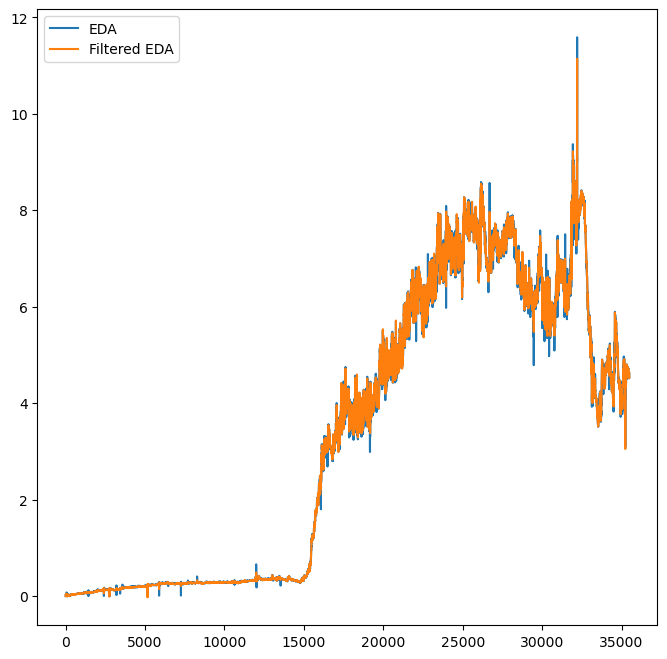

In [8]:
#filtering eda

order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 4 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_eda = filtfilt(b,a,eda_value, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(eda_value, label='EDA')
plt.plot(filtered_eda, label='Filtered EDA')
plt.legend()

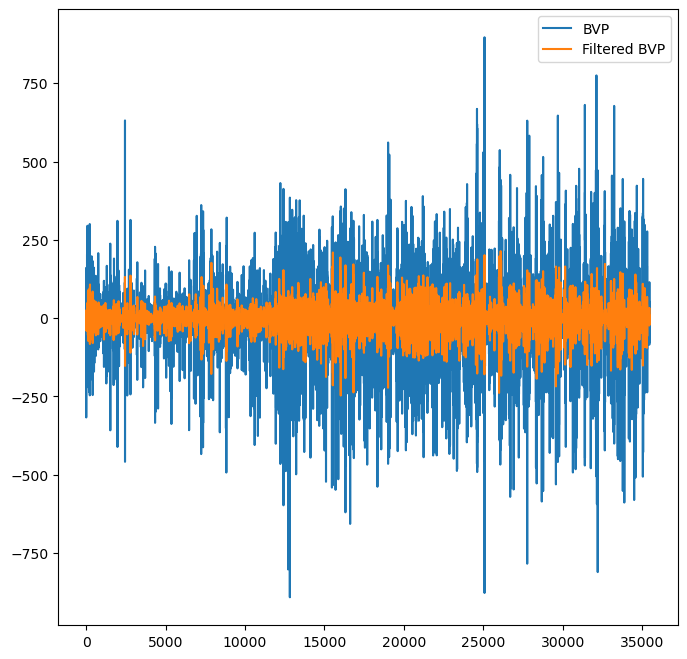

In [9]:
#filtering bvp


order = 5 #order of the filter, expressed as integer
f_cut_off = 0.5 #Hz, cut-off frequency
f_sampling = 4 #Hz, sampling frequency

b, a = butter(order, f_cut_off, fs = f_sampling)

filtered_bvp = filtfilt(b,a,downsampled_bvp, axis=0)

plt.figure(figsize=(8, 8))
plt.plot(downsampled_bvp, label='BVP')
plt.plot(filtered_bvp, label='Filtered BVP')
plt.legend()

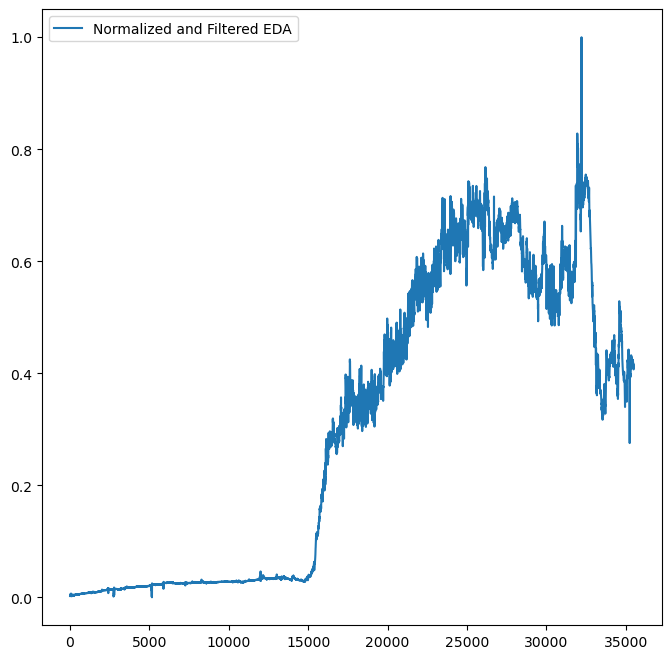

In [10]:
#normalization of eda 0-1

normalized_eda = (filtered_eda-min(filtered_eda))/(max(filtered_eda)-min(filtered_eda))
plt.figure(figsize=(8, 8))
plt.plot(normalized_eda, label='Normalized and Filtered EDA')
plt.legend()

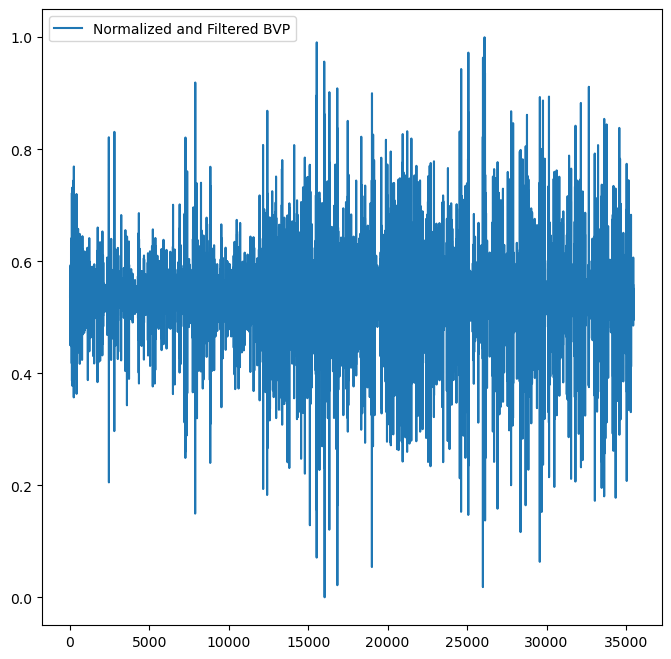

In [11]:
#normalization of bvp 0-1

normalized_bvp = (filtered_bvp-min(filtered_bvp))/(max(filtered_bvp)-min(filtered_bvp))
plt.figure(figsize=(8, 8))
plt.plot(normalized_bvp, label='Normalized and Filtered BVP')
plt.legend()

In [29]:
#reverting numpy arrays back to df and concat

eda_result = pd.DataFrame(normalized_eda, columns = ['EDA'])
bvp_result = pd.DataFrame(normalized_bvp, columns = ['BVP'])

df_result = pd.concat([eda_result, bvp_result], axis = 1)

df_result

,EDA,BVP
0,0.002203,0.536435
1,0.003438,0.569871
2,0.004430,0.577958
3,0.005030,0.551493
4,0.005231,0.503591
...,...,...
35485,0.409364,0.540348
35486,0.410799,0.538900
35487,0.412366,0.534644
35488,0.413993,0.528869


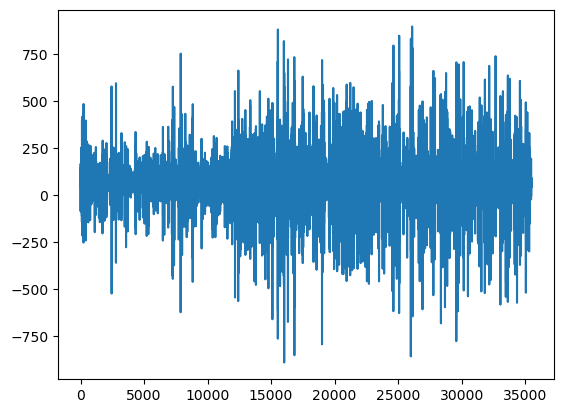

In [30]:

#return back
deneme = normalized_bvp*(max(downsampled_bvp['BVP'])-min(downsampled_bvp['BVP']))+min(downsampled_bvp['BVP'])

plt.plot(deneme)

In [25]:
import os
import datetime

# Assuming df_result is your DataFrame
#df_result = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Define the parent folder path
parent_folder = 'C:/Users/anilp/Project_Files'

# Create a timestamp for the filename
current_datetime = datetime.datetime.now()
timestamp = current_datetime.strftime('%d-%m-%Y %Hh%Mm%Ss')

# Create a new folder with the timestamp
new_folder = os.path.join(parent_folder, timestamp)
os.makedirs(new_folder, exist_ok=True)  # Creates the folder if it doesn't exist

# Define the CSV file path
csv_file_path = os.path.join(new_folder, 'df_result.csv')

# Export the DataFrame to a CSV file
df_result.to_csv(csv_file_path, index=False)  # index=False to exclude the index column

print(f"Data exported to {csv_file_path}")

Data exported to C:/Users/anilp/Project_Files\08-11-2023 14h39m22s\df_result.csv


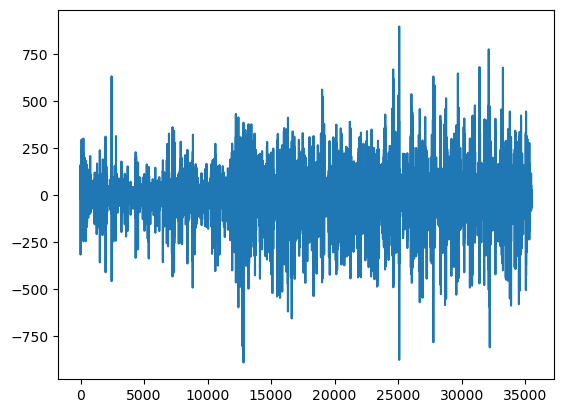